### About Dataset

Binary classification (room occupancy) from Temperature,Humidity,Light and CO2.
Occupancy was obtained from time stamped pictures that were taken every minute.

### Source

Accurate occupancy detection of an office room from light, temperature, humidity and CO2 measurements using statistical learning models. Luis M. Candanedo, Véronique Feldheim. Energy and Buildings. Volume 112, 15 January 2016, Pages 28-39.

https://www.kaggle.com/datasets/kukuroo3/room-occupancy-detection-data-iot-sensor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Occupancy.csv")

df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
20555,2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213,1
20556,2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,1
20557,2015-02-18 09:16:59,20.8900,27.7450,423.500000,1521.500000,0.004237,1
20558,2015-02-18 09:17:59,20.8900,28.0225,418.750000,1632.000000,0.004279,1


In [3]:
#Check types

df.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

Here we have the first issue, dates are describred as object, we must chage this to numerical values. 

In [4]:
df['date'] =  pd.to_datetime(df['date']) #format='%d%b%Y:%H:%M:%S.%f'

df.dtypes

date             datetime64[ns]
Temperature             float64
Humidity                float64
Light                   float64
CO2                     float64
HumidityRatio           float64
Occupancy                 int64
dtype: object

In [5]:
df.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

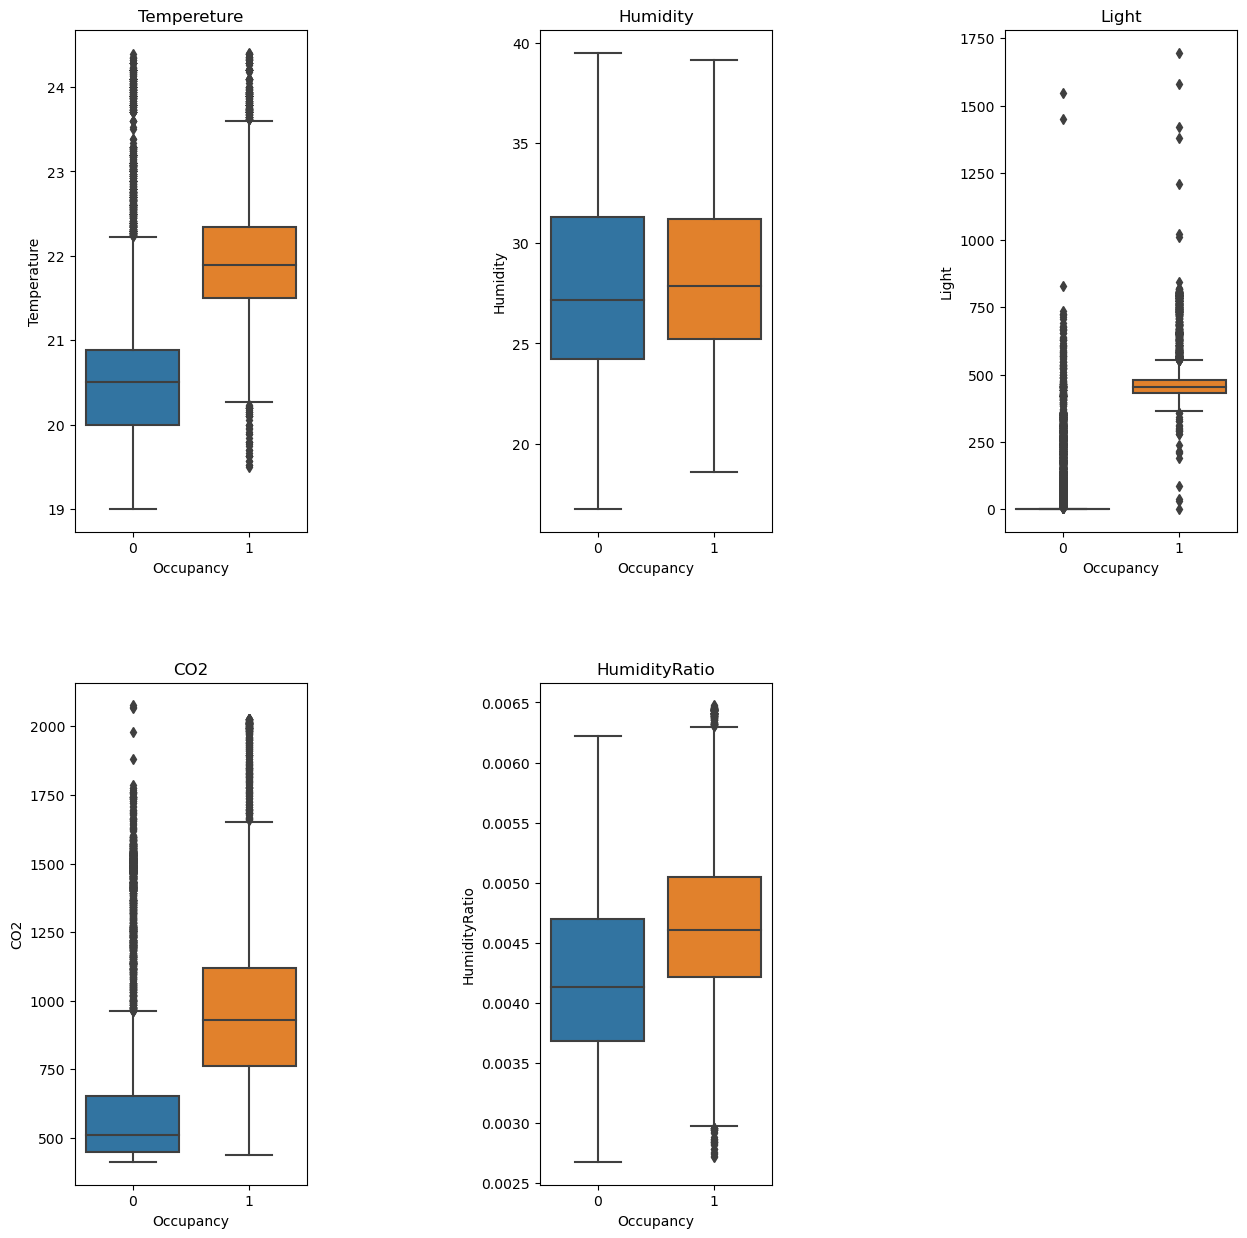

In [6]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2, 3, 1)
sns.boxplot(x='Occupancy', y='Temperature', data=df, showfliers=True, ax=ax)
ax.set_title('Tempereture')
ax = fig.add_subplot(2, 3, 2)
sns.boxplot(x='Occupancy', y='Humidity', data=df, showfliers=True, ax=ax)
ax.set_title('Humidity')
ax = fig.add_subplot(2, 3, 3)
sns.boxplot(x='Occupancy', y='Light', data=df, showfliers=True, ax=ax)
ax.set_title('Light')
ax = fig.add_subplot(2, 3, 4)
sns.boxplot(x='Occupancy', y='CO2', data=df, showfliers=True, ax=ax)
ax.set_title('CO2')
ax = fig.add_subplot(2, 3, 5)
sns.boxplot(x='Occupancy', y='HumidityRatio', data=df, showfliers=True, ax=ax)
ax.set_title('HumidityRatio')

plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=1)
plt.show()

Here we can see that we have lots of outliers in each variable, execpt in Humidity, since humidity should be a continous variable. Lets plot the humidty in time.

Temperature, Light, CO2 and Humidity Ratio might be the most important variables since their increase seems to be related to the occupancy. 

Humidity wont contribute much to the model because there is little dinstinction between in humidy when the room is occupied and when its not. The humidity ratio is related to the temperature, that's why we se a difference when we compare Humidity and Humidity Ratio. 

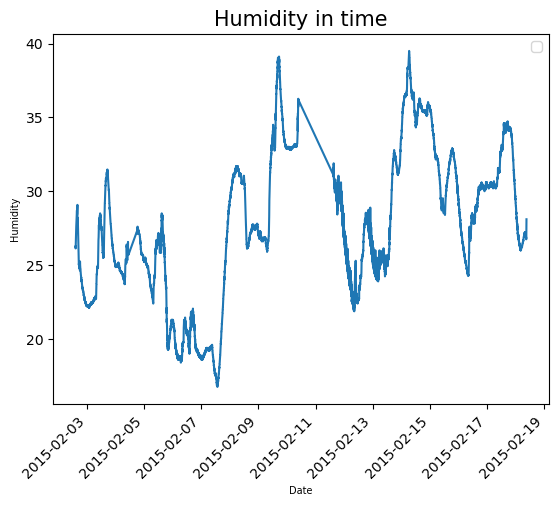

In [7]:
x = df["date"]
y = df["Humidity"]

plt.plot(x, y)
plt.xlabel('Date', fontsize = 7);
plt.xticks(rotation=45, horizontalalignment='right')

plt.ylabel('Humidity', fontsize = 7);
plt.title( "Humidity in time", fontsize = 15);
plt.legend()
plt.show()

Now we have the humidity variation in time, but there is lack of information of whats happening in the room that might be affecting the humidity.

Just plotting the days won't help us much, let's check by day of the week. 

Try to box plot by week day, the variability during time. 

We might see that mondays when we have more people transiting throught the room there might be a change on room Humidity. 

In [8]:
#Check day of the week 
import datetime 





df['weekday'] = df['date'].dt.dayofweek


#I will make a copyof the dataframe to keep the categorical weekdays
#I believe it can be a good variable to help train the model 

df2 = df.copy()


#Let's change the numerical values to weekdays to use on EDA

df["weekday"] = np.where(df.weekday == 0,'Monday',
                            np.where(df.weekday == 1,'Tuesday', 
                            np.where(df.weekday == 2, 'Wednesday', 
                            np.where(df.weekday == 3, 'Thursday', 
                            np.where(df.weekday == 4, 'Friday', "Weekend")))))

#We are setting Saturdays and Sundays together as weekends since
#the occupation should be simmilar on those days. You can do an independent 
#check on those variables if you wish

df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,weekday
0,2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1,Monday
1,2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,0.004773,1,Monday
2,2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1,Monday
3,2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1,Monday
4,2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1,Monday
...,...,...,...,...,...,...,...,...
20555,2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213,1,Wednesday
20556,2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,1,Wednesday
20557,2015-02-18 09:16:59,20.8900,27.7450,423.500000,1521.500000,0.004237,1,Wednesday
20558,2015-02-18 09:17:59,20.8900,28.0225,418.750000,1632.000000,0.004279,1,Wednesday


<AxesSubplot:title={'center':'Humidity'}, xlabel='weekday', ylabel='Humidity'>

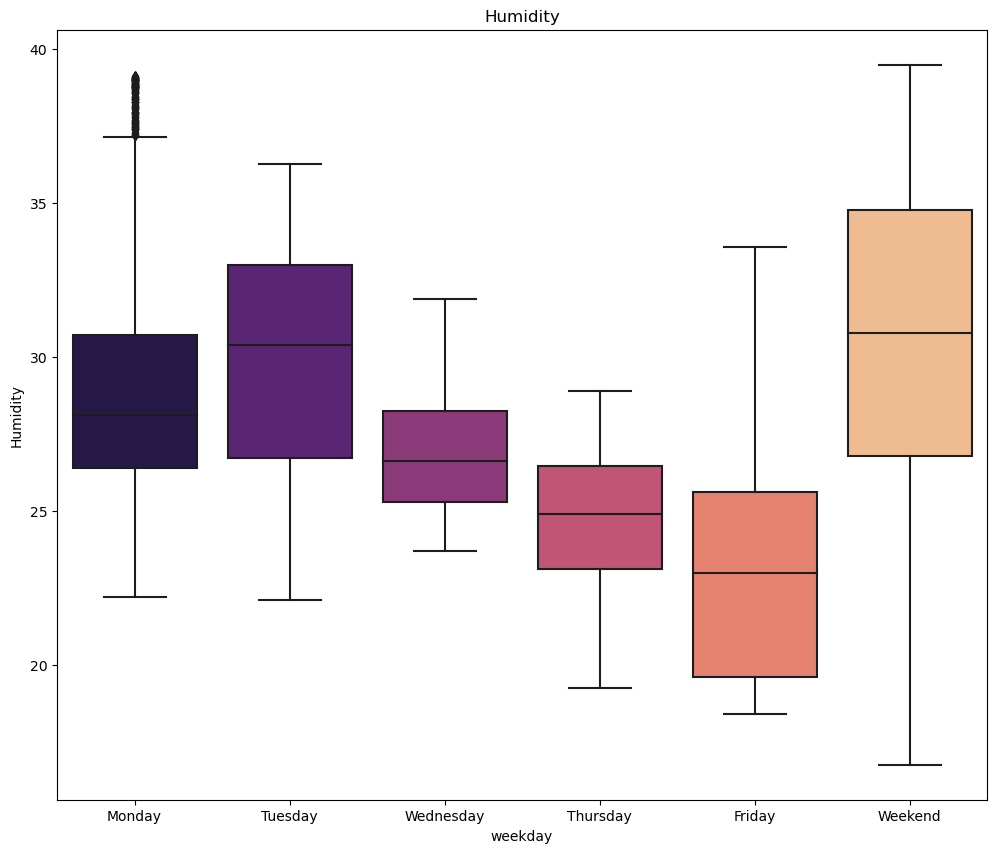

In [9]:
plt.figure(figsize=(12,10))
plt.title("Humidity")
sns.boxplot(y="Humidity", x="weekday", data = df , palette = 'magma')

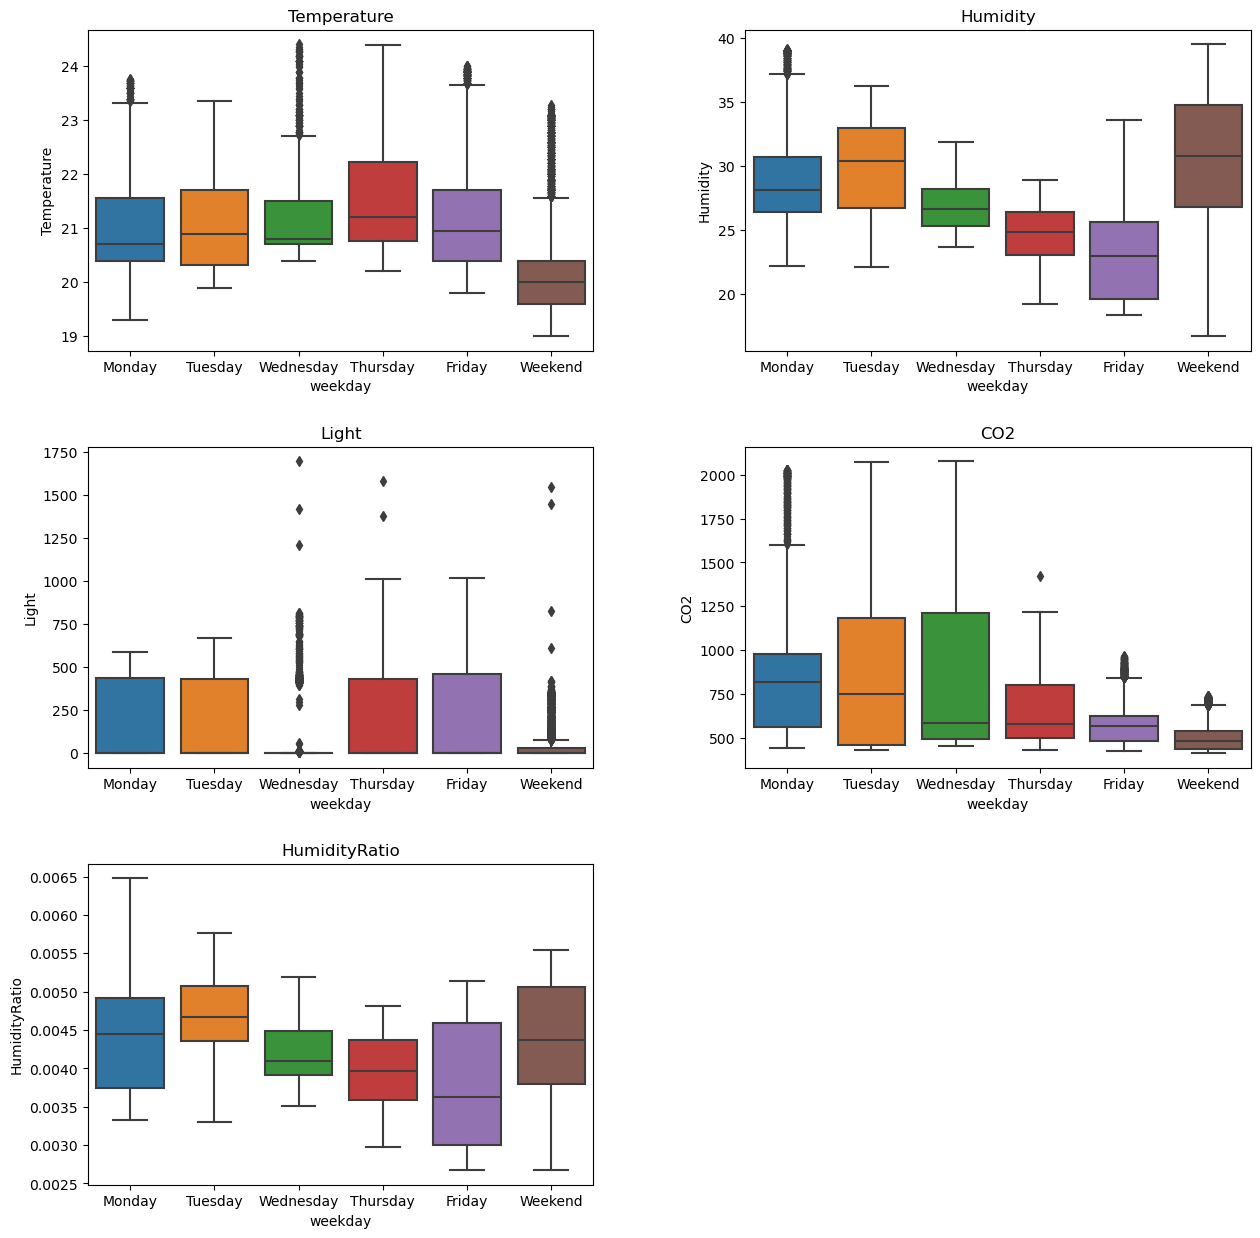

In [10]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(3, 2, 1)
sns.boxplot(x='weekday', y='Temperature', data=df, showfliers=True, ax=ax)
ax.set_title('Temperature')
ax = fig.add_subplot(3, 2, 2)
sns.boxplot(x='weekday', y='Humidity', data=df, showfliers=True, ax=ax)
ax.set_title('Humidity')
ax = fig.add_subplot(3, 2, 3)
sns.boxplot(x='weekday', y='Light', data=df, showfliers=True, ax=ax)
ax.set_title('Light')
ax = fig.add_subplot(3, 2, 4)
sns.boxplot(x='weekday', y='CO2', data=df, showfliers=True, ax=ax)
ax.set_title('CO2')
ax = fig.add_subplot(3, 2, 5)
sns.boxplot(x='weekday', y='HumidityRatio', data=df, showfliers=True, ax=ax)
ax.set_title('HumidityRatio')

plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.3)
plt.show()

Light and CO2 are the smallest during the weekends, it is expected since we should have the lowest occupation. 

Overal the light use is constant during the week, except wednesdays.
We can see that something happens on Wednesdays since there is very small light use with lots of outliers, I would intrepret this as the office it's not normaly used on wednesdays but we might still have people showing up from time to time



Temperature and Humidity have a high variation during the weekends but we can imagine that these variables are not codependent to the occupation 

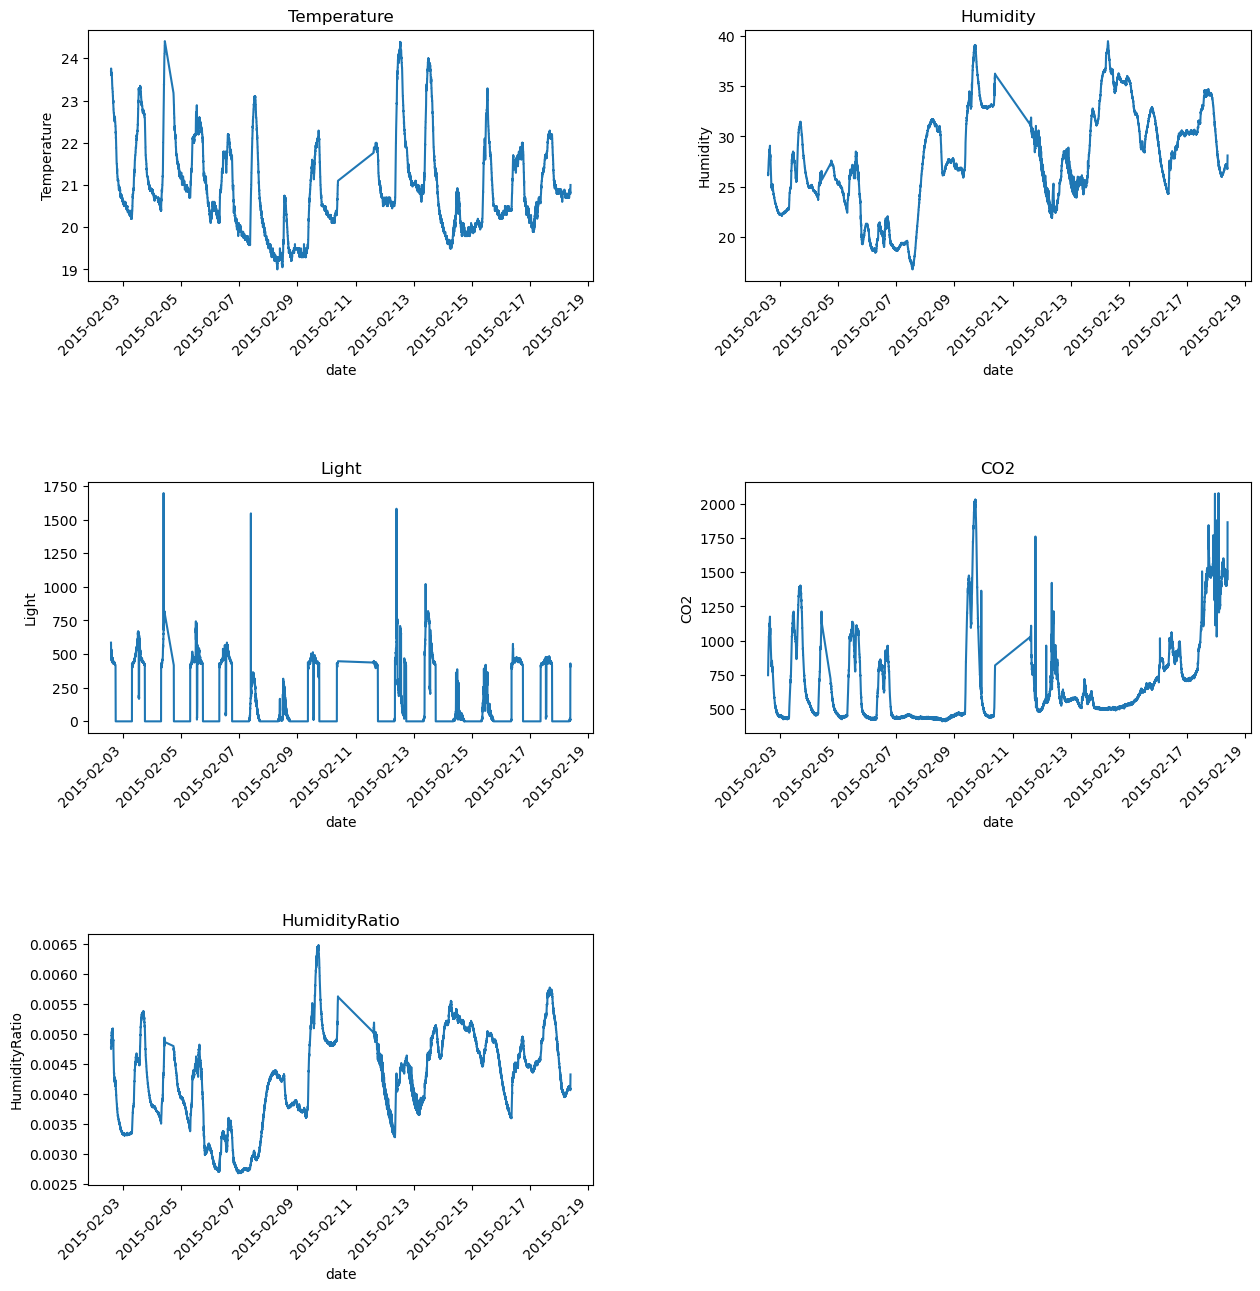

In [11]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(3, 2, 1)
sns.lineplot(x='date', y='Temperature', data=df, ax=ax)
ax.set_title('Temperature')
plt.xticks(rotation=45, horizontalalignment='right')

ax = fig.add_subplot(3, 2, 2)
sns.lineplot(x='date', y='Humidity', data=df, ax=ax)
ax.set_title('Humidity')
plt.xticks(rotation=45, horizontalalignment='right')

ax = fig.add_subplot(3, 2, 3)
sns.lineplot(x='date', y='Light', data=df, ax=ax)
ax.set_title('Light')
plt.xticks(rotation=45, horizontalalignment='right')

ax = fig.add_subplot(3, 2, 4)
sns.lineplot(x='date', y='CO2', data=df, ax=ax)
ax.set_title('CO2')
plt.xticks(rotation=45, horizontalalignment='right')

ax = fig.add_subplot(3, 2, 5)
sns.lineplot(x='date', y='HumidityRatio', data=df, ax=ax)
ax.set_title('HumidityRatio')
plt.xticks(rotation=45, horizontalalignment='right')

plt.subplots_adjust(hspace=0.8)
plt.subplots_adjust(wspace=0.3)
plt.show()

Plotting a Report 

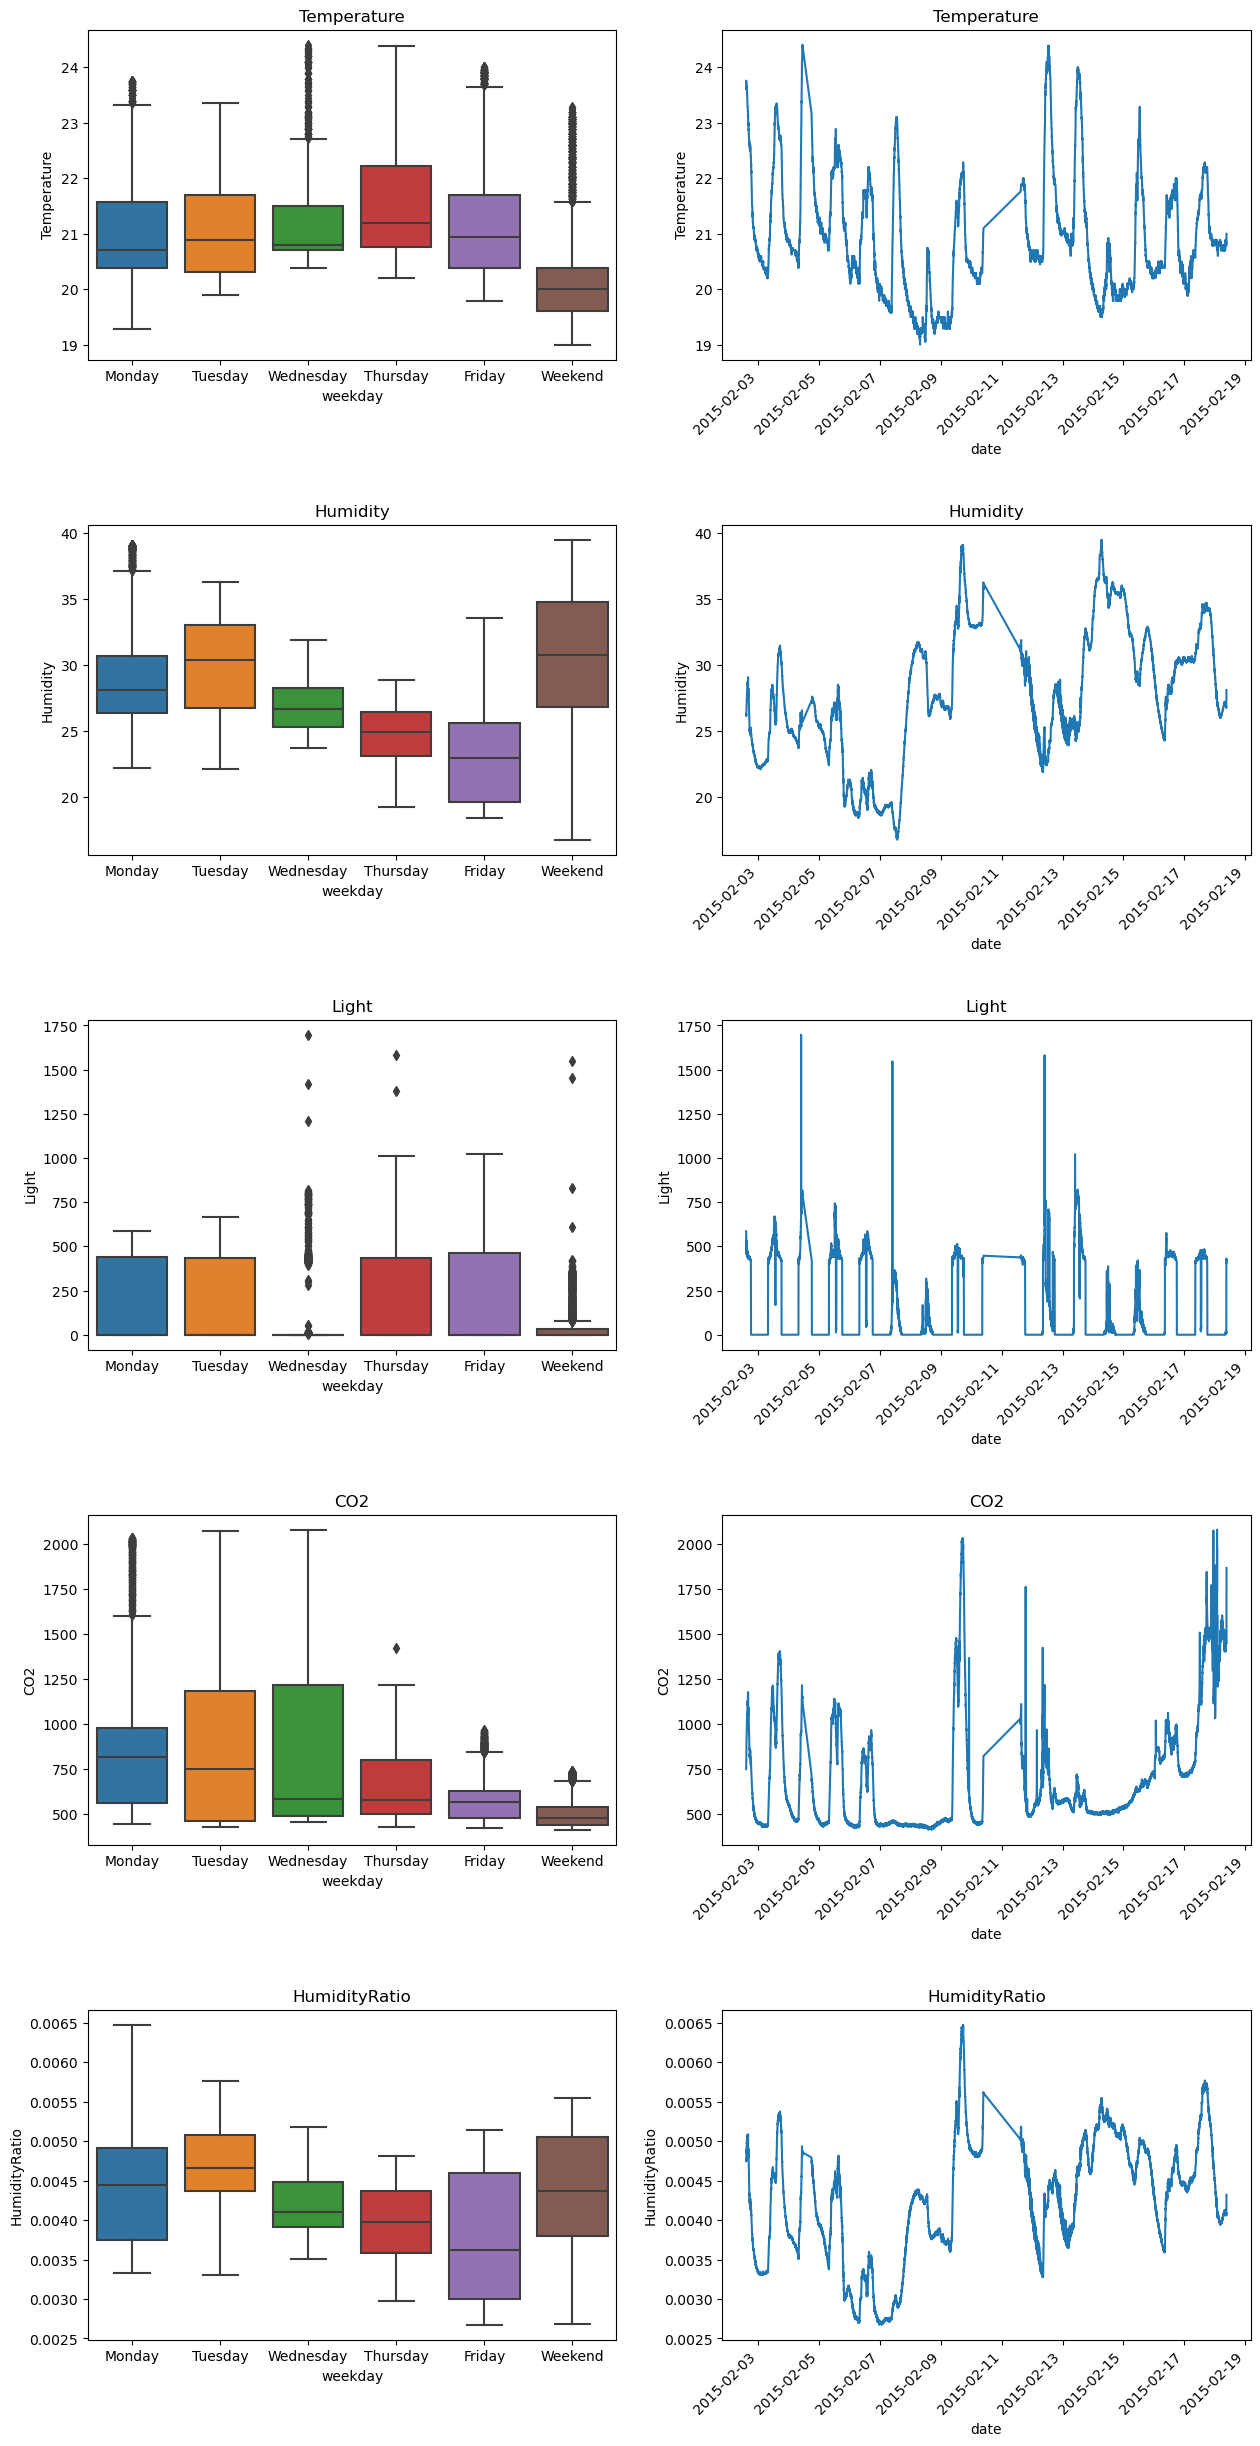

In [12]:
fig = plt.figure(figsize=(15,30))
ax = fig.add_subplot(5, 2, 1)
sns.boxplot(x='weekday', y='Temperature', data=df, showfliers=True, ax=ax)
ax.set_title('Temperature')

ax = fig.add_subplot(5, 2, 2)
sns.lineplot(x='date', y='Temperature', data=df, ax=ax)
ax.set_title('Temperature')
plt.xticks(rotation=45, horizontalalignment='right')

####################################################

ax = fig.add_subplot(5, 2, 3)
sns.boxplot(x='weekday', y='Humidity', data=df, showfliers=True, ax=ax)
ax.set_title('Humidity')

ax = fig.add_subplot(5, 2, 4)
sns.lineplot(x='date', y='Humidity', data=df, ax=ax)
ax.set_title('Humidity')
plt.xticks(rotation=45, horizontalalignment='right')

####################################################

ax = fig.add_subplot(5, 2, 5)
sns.boxplot(x='weekday', y='Light', data=df, showfliers=True, ax=ax)
ax.set_title('Light')

ax = fig.add_subplot(5, 2, 6)
sns.lineplot(x='date', y='Light', data=df, ax=ax)
ax.set_title('Light')
plt.xticks(rotation=45, horizontalalignment='right')



####################################################
ax = fig.add_subplot(5, 2, 7)
sns.boxplot(x='weekday', y='CO2', data=df, showfliers=True, ax=ax)
ax.set_title('CO2')

ax = fig.add_subplot(5, 2, 8)
sns.lineplot(x='date', y='CO2', data=df, ax=ax)
ax.set_title('CO2')
plt.xticks(rotation=45, horizontalalignment='right')


####################################################
ax = fig.add_subplot(5, 2, 9)
sns.boxplot(x='weekday', y='HumidityRatio', data=df, showfliers=True, ax=ax)
ax.set_title('HumidityRatio')

ax = fig.add_subplot(5, 2, 10)
sns.lineplot(x='date', y='HumidityRatio', data=df, ax=ax)
ax.set_title('HumidityRatio')
plt.xticks(rotation=45, horizontalalignment='right')



plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.2)
plt.show()

In [15]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split


In [16]:
df2.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy', 'weekday'],
      dtype='object')

In [17]:
x = df2.drop(["date",'Occupancy'], axis= 1)

y = df2['Occupancy']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [18]:
# Training the model - Time to fry

mlp1 = MLPClassifier(hidden_layer_sizes = (100,200,100), max_iter = 200,
                    solver = "sgd", verbose = 10, tol = 1e-8, random_state = 42,
                    learning_rate_init = .00005, learning_rate = "adaptive", activation = "tanh")

mlp1.fit(x_train, y_train)

Iteration 1, loss = 0.63855269
Iteration 2, loss = 0.45421521
Iteration 3, loss = 0.38379149
Iteration 4, loss = 0.33276394
Iteration 5, loss = 0.29286290
Iteration 6, loss = 0.26127444
Iteration 7, loss = 0.23635353
Iteration 8, loss = 0.21803194
Iteration 9, loss = 0.20404928
Iteration 10, loss = 0.19251375
Iteration 11, loss = 0.18505533
Iteration 12, loss = 0.17931327
Iteration 13, loss = 0.17461145
Iteration 14, loss = 0.17055535
Iteration 15, loss = 0.16714536
Iteration 16, loss = 0.16410798
Iteration 17, loss = 0.16147975
Iteration 18, loss = 0.15931011
Iteration 19, loss = 0.15740512
Iteration 20, loss = 0.15538938
Iteration 21, loss = 0.15239921
Iteration 22, loss = 0.14946565
Iteration 23, loss = 0.14780261
Iteration 24, loss = 0.14604561
Iteration 25, loss = 0.14419270
Iteration 26, loss = 0.14256031
Iteration 27, loss = 0.14098243
Iteration 28, loss = 0.13923813
Iteration 29, loss = 0.13685401
Iteration 30, loss = 0.13373820
Iteration 31, loss = 0.13040897
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 200, 100),
              learning_rate='adaptive', learning_rate_init=5e-05,
              random_state=42, solver='sgd', tol=1e-08, verbose=10)

In [19]:
#Train test predictions

y_pred_train = mlp1.predict(x_train)
y_pred_test = mlp1.predict(x_test)

In [20]:
#Training Confusion Matrix

print(confusion_matrix(y_train, y_pred_train))
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report(y_train, y_pred_train))

[[10872   184]
 [   12  3324]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     11056
           1       0.95      1.00      0.97      3336

    accuracy                           0.99     14392
   macro avg       0.97      0.99      0.98     14392
weighted avg       0.99      0.99      0.99     14392



In [21]:
#Test Confusion Matrix

print(confusion_matrix(y_test, y_pred_test))
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report(y_test, y_pred_test))

[[4694   60]
 [   8 1406]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4754
           1       0.96      0.99      0.98      1414

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.98      6168
weighted avg       0.99      0.99      0.99      6168

